# 1. 시그모이드 함수 구현하기

In [2]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # np.exp(-x)는 exp(-x)와 같다.



x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

- 배열이 들어갔는데도 구현이 잘 되는 것은 넘파이의 브로드캐스트 기능때문이다.
- 브로드캐스트 예시

In [3]:
t = np.array([1.0, 2.0, 3.0])

1.0 + t

array([2., 3., 4.])

In [4]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

# 2. 시그모이드 함수 그래프 구현

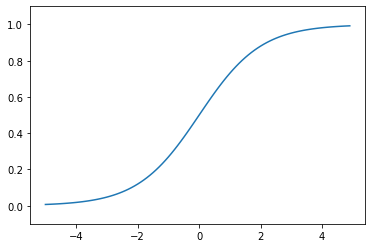

In [5]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# 3. 계단 함수 구현하기
- 계단 함수는 입력이 0을 넘으면 1을 출력, 그 외에는 0을 출력하는 함수

In [7]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
# 위 함수의 경우 인수 x는 실수(부동소수점)만 받아들임. 넘파이 배열 불가능
# 넘파이 트릭을 활용하여 아래와 같은 함수 구현

def step_function(x):
    y = x > 0 # x가 0보다 큰값인지 아닌지에 따라서 y에 True, False 반환
    return y.astype(np.int) # 자료형을 변환해주는 .astype()로 인해, True는 1, False는 0반환

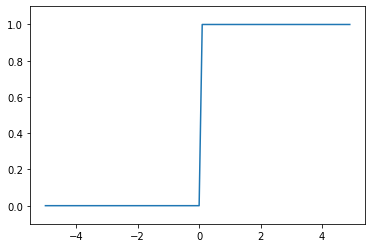

In [8]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# 4. ReLU 함수

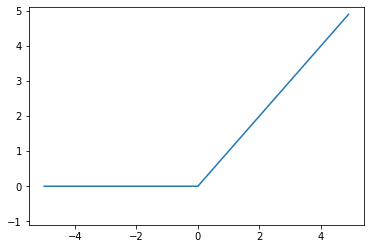

In [11]:
def relu(x):
    return np.maximum(0, x) # np.maximum(a,b) a, b중 큰 값을 선택해 반환

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1) # y축의 범위 지정
plt.show()

# 5. 다차원 배열

In [14]:
# 1차원 배열 예시
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [13]:
print(np.ndim(A)) # 배열의 차원의 갯수를 알려줌

1


In [15]:
print(A.shape) # 행과 열의 갯수를 알려줌(튜플로 반환)/1행 4열의 경우 (4,), 4행 1열일 경우(4,1)

(4,)


In [16]:
print(A.shape[0])

4


In [18]:
# 2차원 배열 예시
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [19]:
print(np.ndim(B))

2


In [20]:
print(B.shape)

(3, 2)


In [21]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
print(A.shape)

(2, 2)


In [22]:
B = np.array([[5, 6], [7, 8]])
print(B.shape)

(2, 2)


In [23]:
np.dot(A, B) # A*B와는 다름

array([[19, 22],
       [43, 50]])

In [24]:
# 형상이 다른 행렬의 곱
# 1)
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)

(2, 3)


In [25]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)

(3, 2)


In [26]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [27]:
# 2)
C = np.array([[1, 2], [3, 4]])
print(C.shape)

(2, 2)


In [28]:
print(A.shape)

(2, 3)


In [29]:
np.dot(A, C) # >>> ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [30]:
# 3)
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)

(3, 2)


In [31]:
B = np.array([7, 8])
print(B.shape)

(2,)


In [32]:
np.dot(A, B)

array([23, 53, 83])

- A와 B의 대응하는 차원의 원소 수가 같아야 함.
- 계산 결과인 행렬 C의 형상은 행렬 A의 행수와 행렬 B의 열수가 됨.
- A가 2차원 행렬이고 B가 1차원 배열일 때도 
- 대응하는 차원의 원소 수를 일치시켜라'는 원칙이 똑같이 적용됨.

# 6. 신경망에서의 행렬의 곱

In [33]:
X = np.array([1,2])
X.shape 

(2,)

In [34]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [35]:
W.shape 

(2, 3)

In [36]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [37]:
X.shape

(2,)

In [38]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [39]:
W.shape 

(2, 3)

In [40]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [41]:
X = np.array([1,2])
X.shape 

(2,)

In [42]:
W = np.array([[1,3,5], [2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [43]:
W.shape 

(2, 3)

In [44]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


# 7. 3층 신경망 구현하기

In [45]:
#입력층에서 1층으로의 신호 전달
X = np.array([1.0, 0.5]) #(1,2)
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #(2,3)
B1 = np.array([0.1, 0.2, 0.3]) #(1,3)

A1 = np.dot(X, W1) + B1 #(1,3)
print(A1)

[0.3 0.7 1.1]


In [46]:
# 활성화 함수로 시그모이드 함수를 사용하기로 했을 때
Z1 = sigmoid(A1) #(1,3)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [49]:
#1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #(3,2)
B2 = np.array([0.1, 0.2]) #(1,2)

A2 = np.dot(Z1, W2) + B2 #(1,2)
Z2 = sigmoid(A2) #(1,2)

In [50]:
# 2층에서 출력층으로의 신호 전달
# 출력층의 활성화 함수를 identity_function으로 정의
# 해당 부분에서는 항등함수로 진행하였음.
def identity_function(x):
      return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]]) #2*2
B3 = np.array([0.1, 0.2]) #1*2

A3 = np.dot(Z2, W3) + B3 #1*2
Y = identity_function(A3)

- 일반적으로 회귀 에서는 출력층의 활성화 함수를 항등함수로, 
- 2클래스 분류 에서는 시그모이드 함수로, 
- 다중 클래스 분류 에서는 소프트맥스 함수 로 사용한다